- iris 데이터 종 예측

In [3]:
import seaborn as sns  # iris 데이터 가져오기
import pandas as pd    # 원핫인코딩(문자pd.get_dummies())
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

In [4]:
# 1. 데이터 생성 및 전처리
iris = sns.load_dataset('iris')
# 독립변수와 종속변수 분리
iris_X = iris.iloc[:,:-1].to_numpy()
iris_y = iris.iloc[:, -1]
iris_Y = pd.get_dummies(iris_y).values
# iris_Y[::50]
# 훈련셋 : 테스트셋 = 8: 2
X_train, X_test, Y_train, Y_test = train_test_split(iris_X, iris_Y,
                                                   test_size = 0.2,
                                                   stratify = iris_Y,# 층화추출
                                                   random_state = 4)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((120, 4), (120, 3), (30, 4), (30, 3))

In [5]:
# 층화 추출했는지 확인
pd.Series(np.argmax(Y_train, axis=1)).value_counts()

0    40
1    40
2    40
dtype: int64

In [6]:
pd.Series(np.argmax(Y_test, axis=1)).value_counts()

1    10
2    10
0    10
dtype: int64

In [7]:
# 2. 모델 구성 (입력4 - 출력 3) 방법1
model = Sequential()
model.add(Dense(units=60, input_dim=4, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=3, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                300       
                                                                 
 dense_1 (Dense)             (None, 50)                3050      
                                                                 
 dense_2 (Dense)             (None, 30)                1530      
                                                                 
 dense_3 (Dense)             (None, 3)                 93        
                                                                 
Total params: 4,973
Trainable params: 4,973
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
# 2. 모델 구성 (입력4 - 출력 3) 방법2
model = Sequential([
    Input(4),
    Dense(units=64, activation='relu'),
    Dense(units=128, activation='relu'),
    Dropout(0.2),
    Dense(units=32, activation='relu'),
    Dense(units=16, activation='relu'),
    Dropout(0.1),
    Dense(units=3, activation='softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                320       
                                                                 
 dense_19 (Dense)            (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 32)                4128      
                                                                 
 dense_21 (Dense)            (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_22 (Dense)            (None, 3)                

In [33]:
# 3. 모델학습과정
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [43]:
# 4. 모델 학습시키기 : epoch마다 val_accuracy(val_loss, accuracy, loss)값이 좋을 때 모델을 자동 저장하는 콜백 추가
# 모델을 저장할 경로 : ./model/iris-100-val0.6521.h5
import os
model_save_folder = './model/'
if not os.path.exists(model_save_folder):
    os.mkdir(model_save_folder)  # model_save_folder가 없으면 폴더 생성

# 조기 종료 콜백
earlystopping = EarlyStopping(patience=40, monitor='val_loss')  # monitor='val_loss' : 기본값
# 모델 자동 저장 콜백 객체 생성
file = model_save_folder + 'iris-{epoch:03d}-val{val_accuracy:.4f}.h5'
checkpoint = ModelCheckpoint(filepath=file,           # 저장경로
                             monitor='val_accuracy',  # 모니터링할 지표
                             save_best_only=True,     # 모니터링한 지표가 개선된 경우만 저장. False면 매번 저장.
                             mode='max',              # 값이 클수록 저장. 'min':값이 작을수록 저장. 'auto':모니터링에 의해 자동 저장.
                             verbos=1)                # 저장 여부 로그 출력 (0:출력 안 함)
hist = model.fit(X_train, Y_train,
                 # batch_size=50,  # 한 배치사이즈마다 w, b값 조정
                 epochs=500,
                 validation_split=0.2,
                 callbacks=[checkpoint, earlystopping]
                )

Epoch 1/500
3/3 [==============================] - 0s 49ms/step - loss: 0.0596 - accuracy: 0.9792 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 2/500
3/3 [==============================] - 0s 22ms/step - loss: 0.0946 - accuracy: 0.9688 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 3/500
3/3 [==============================] - 0s 22ms/step - loss: 0.0824 - accuracy: 0.9792 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 4/500
3/3 [==============================] - 0s 22ms/step - loss: 0.0593 - accuracy: 0.9792 - val_loss: 0.0716 - val_accuracy: 0.9583
Epoch 5/500
3/3 [==============================] - 0s 25ms/step - loss: 0.0894 - accuracy: 0.9583 - val_loss: 0.0432 - val_accuracy: 0.9583
Epoch 6/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0727 - accuracy: 0.9688 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 7/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0702 - accuracy: 0.9792 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 8/500
3/3 [===

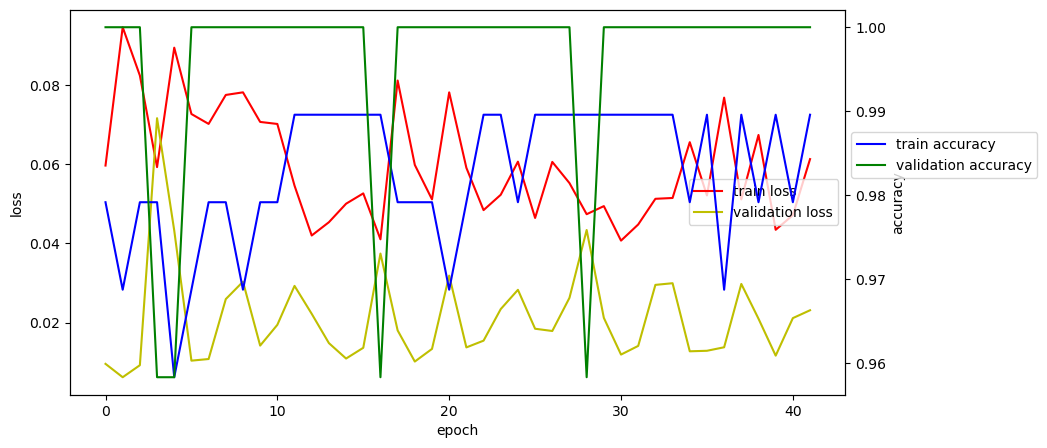

In [44]:
# 5. 모델 평가하기
# 학습과정 표시하기(validation dataset 있는 경우)
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

In [50]:
# 모델 평가
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 24ms/step - loss: 0.1460 - accuracy: 0.9333


[0.14598006010055542, 0.9333333373069763]

In [51]:
# 교차표
real = np.argmax(Y_test, axis=1)
pred = np.argmax(model.predict(X_test), axis=1)
ctab = pd.crosstab(real, pred)
ctab.columns = list(iris['species'][::50]) # ['setosa', 'versicolor', 'virginica']
ctab.columns.name = 'predict'
ctab.index = iris['species'][::50]
ctab.index.name = 'real'
ctab

1/1 [==============================] - 0s 31ms/step


predict,setosa,versicolor,virginica
real,,,
setosa,10,0,0
versicolor,0,8,2
virginica,0,0,10


In [52]:
list(iris['species'][::50])

['setosa', 'versicolor', 'virginica']

In [53]:
# 저장된 모델 중 성능이 제일 좋아 보이는 것 load
from tensorflow.keras.models import load_model
model2 = load_model('model/iris-008-val0.9167.h5')
model2.evaluate(X_test, Y_test)

OSError: No file or directory found at model/iris-006-val0.9583.h5

In [54]:
# 저장된 모델의 교차표
real = np.argmax(Y_test, axis=1)
pred = np.argmax(model2.predict(X_test), axis=1)
ctab = pd.crosstab(real, pred)
ctab.columns = list(iris['species'][::50]) # ['setosa', 'versicolor', 'virginica']
ctab.columns.name = 'predict'
ctab.index = iris['species'][::50]
ctab.index.name = 'real'
ctab

1/1 [==============================] - 0s 18ms/step


predict,setosa,versicolor,virginica
real,,,
setosa,10,0,0
versicolor,0,7,3
virginica,0,0,10


In [57]:
# 모델 사용하기(예측하기)
iris[100:101]

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica


In [58]:
model2.predict(np.array([[6.3, 3.3, 6.0, 2.5]]))

1/1 [==============================] - 0s 19ms/step


array([[0.178085  , 0.38629806, 0.4356169 ]], dtype=float32)